In [66]:
# BIBLIOTECAS/MÓDULOS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pprint import pprint
from pylab import rcParams
import os
import glob
import shutil
import csv

C:\Users\mvrgu\AppData\Local\Temp/ipykernel_17372/1643321080.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center', fontsize=15)


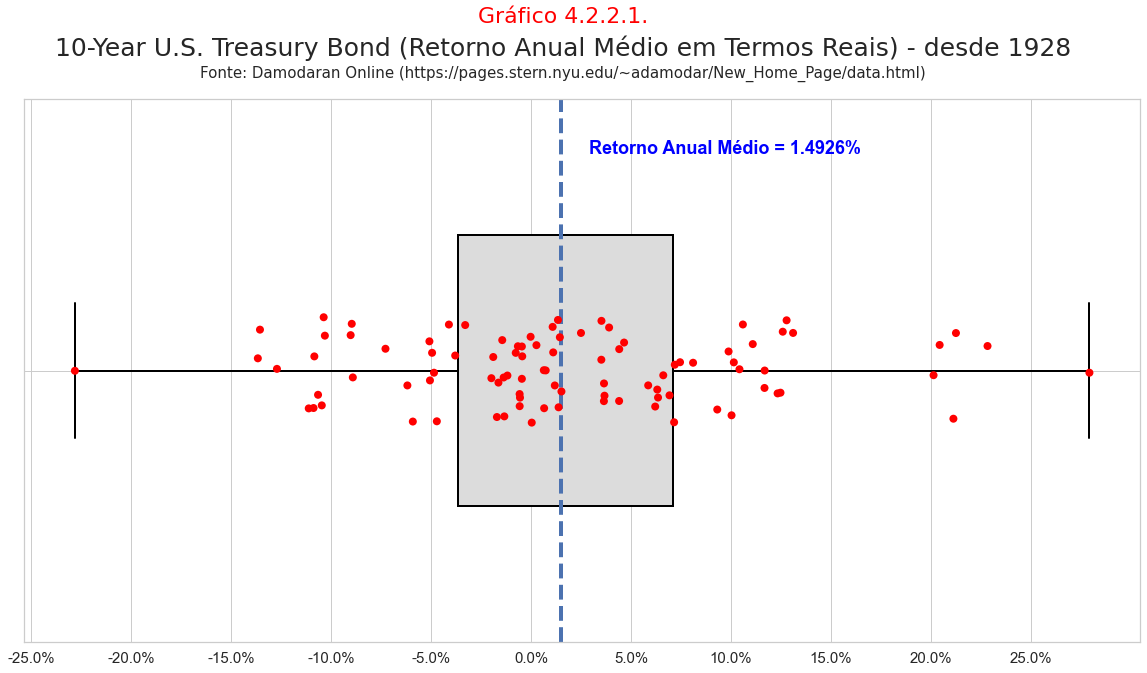

In [67]:
# GRÁFICO 4.2.2.1.
# 10-Year U.S. Treasury Bond - Real Returns (since 1928)
pd.options.display.float_format = '{:,.6f}'.format

USTreasuryReal = pd.read_csv('C:/Users/mvrgu/OneDrive/Documentos/Scanned Documents/Mestrado/Trabalho Final/DamodaranData/Tratados/Damodaran.csv', encoding='utf-8-sig', sep=';')
USTreasuryReal['Real Value US T. Bond (10-year)'] = (USTreasuryReal["Real Return US T. Bond (10-year)"] + 1).cumprod()*100
USTreasuryReal1 = USTreasuryReal
USTreasuryReal1 = USTreasuryReal1[(USTreasuryReal1['Year'] > 1929)]
USTreasuryReal1 = USTreasuryReal1[(USTreasuryReal1['Year'] < 2024)]
USTreasuryReal2 = USTreasuryReal
USTreasuryReal2 = USTreasuryReal2[(USTreasuryReal2['Year'] > 1928)]
USTreasuryReal2 = USTreasuryReal2[(USTreasuryReal2['Year'] < 2024)]

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.boxplot(x=USTreasuryReal1['Real Return US T. Bond (10-year)']*100,  whis=np.inf, width=0.5,capprops=dict(color="black", linewidth=2),whiskerprops=dict(color="black", linewidth=2), boxprops=dict(color="black", facecolor="gainsboro", linewidth=2), medianprops={'color': 'forestgreen', 'ls': '-', 'lw': 0}, flierprops=dict(marker='o', color="black", linewidth=5, alpha=.5),showmeans=False,meanline=True,meanprops={'color': 'blue', 'ls': 'solid', 'lw': 4})
ax = sns.stripplot(x=USTreasuryReal1['Real Return US T. Bond (10-year)']*100,  color="red", s = 8)
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center', fontsize=15)
ax.xaxis.set_ticks(np.arange(-25,30,5))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f%%'))
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_yticklabels(ax.get_yticklabels(),rotation=90,verticalalignment='center',fontsize=17)
ax.text(x= 1.6, y=-0.64, s='Gráfico 4.2.2.1.', fontsize=22, weight='normal',horizontalalignment='center', family="DejaVu", color="red")
ax.text(x= 1.6, y=-0.58, s='10-Year U.S. Treasury Bond (Retorno Anual Médio em Termos Reais) - desde 1928', fontsize=25, weight='normal',horizontalalignment='center', family="DejaVu")
ax.text(x= 1.6, y=-0.54, s='Fonte: Damodaran Online (https://pages.stern.nyu.edu/~adamodar/New_Home_Page/data.html)', fontsize=15, weight='normal',horizontalalignment='center', family="DejaVu")

plt.axvline((np.power((USTreasuryReal1['Real Value US T. Bond (10-year)'].iloc[-1])/100,(1/(USTreasuryReal1['Year'].iloc[-1]-1928)))-1)*100, 0, 1, ls = "--", lw = 4)
MediaUSTReal = 'Retorno Anual Médio = ' + np.round((np.power((USTreasuryReal1['Real Value US T. Bond (10-year)'].iloc[-1])/100,(1/(USTreasuryReal1['Year'].iloc[-1]-1928)))-1)*100, decimals = 4).astype(str) +'%'
for ytick in ax.get_yticks():
    ax.text((np.power((USTreasuryReal1['Real Value US T. Bond (10-year)'].iloc[-1])/100,(1/(USTreasuryReal1['Year'].iloc[-1]-1928)))-1)*650,ytick-0.4,(MediaUSTReal),
                 horizontalalignment='center',size='small',color='blue',weight='semibold', rotation = 0,fontsize=18)

plt.grid()
plt.show()
ax.get_figure().savefig('C:/Users/mvrgu/OneDrive/Documentos/Scanned Documents/Mestrado/Trabalho Final/DamodaranData/Tratados/Real Value US T. Bond (10-year).pdf',bbox_inches='tight')


C:\Users\mvrgu\AppData\Local\Temp/ipykernel_17372/4065837982.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center', fontsize=15)


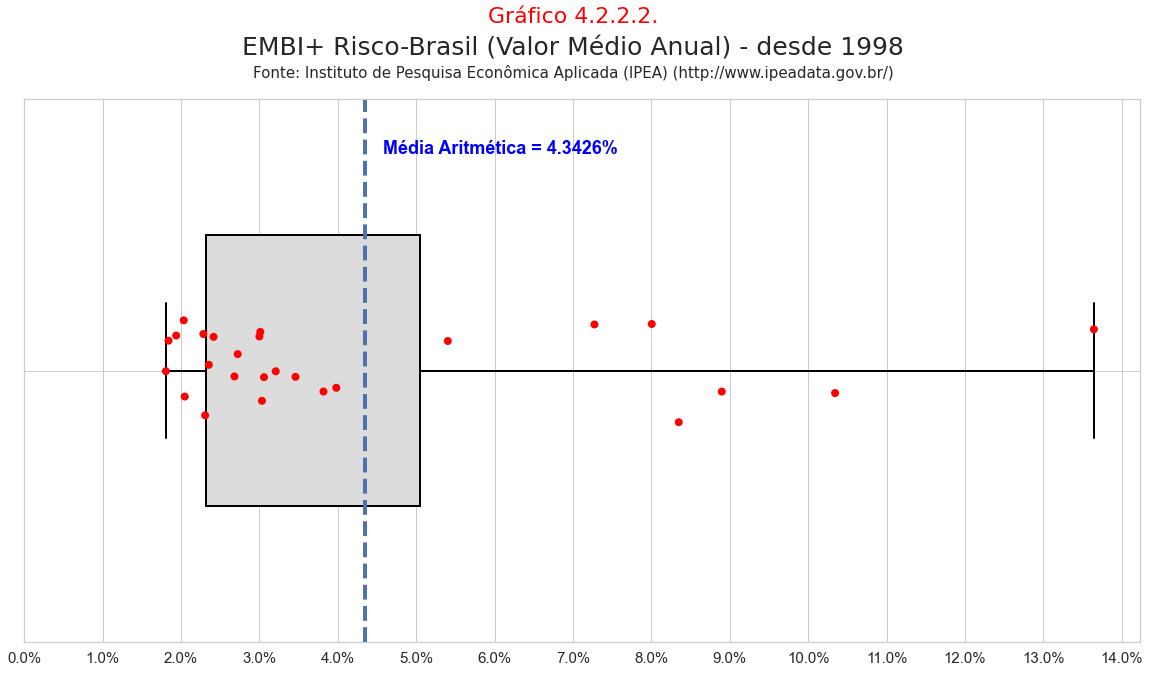

In [68]:
# GRÁFICO 4.2.2.2.
# EMBI+ Risco-Brasil (desde 1998)
pd.options.display.float_format = '{:,.6f}'.format

EMBIBrasil = pd.read_csv('C:/Users/mvrgu/OneDrive/Documentos/Scanned Documents/Mestrado/Trabalho Final/EMBIBrasil/Tratados/EMBIBrasil.csv', encoding='utf-8-sig', sep=',', decimal='.')
EMBIBrasil = EMBIBrasil[['Year','EMBIBrasil']] 
EMBIBrasil['EMBIBrasil'] = (EMBIBrasil['EMBIBrasil'] / 10000)
EMBIBrasil = EMBIBrasil[(EMBIBrasil['Year'] > 1997)]
EMBIBrasil = EMBIBrasil[(EMBIBrasil['Year'] < 2024)]

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.boxplot(x=EMBIBrasil['EMBIBrasil']*100,  whis=np.inf, width=0.5,capprops=dict(color="black", linewidth=2),whiskerprops=dict(color="black", linewidth=2), boxprops=dict(color="black", facecolor="gainsboro", linewidth=2), medianprops={'color': 'forestgreen', 'ls': '-', 'lw': 0}, flierprops=dict(marker='o', color="black", linewidth=5, alpha=.5),showmeans=False,meanline=True,meanprops={'color': 'blue', 'ls': 'solid', 'lw': 4})
ax = sns.stripplot(x=EMBIBrasil['EMBIBrasil']*100,  color="red", s = 8)
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center', fontsize=15)
ax.xaxis.set_ticks(np.arange(-0,15,1))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f%%'))
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_yticklabels(ax.get_yticklabels(),rotation=90,verticalalignment='center',fontsize=17)
ax.text(x=7, y=-0.64, s='Gráfico 4.2.2.2.', fontsize=22, weight='normal',horizontalalignment='center', family="DejaVu", color="red")
ax.text(x=7, y=-0.58, s='EMBI+ Risco-Brasil (Valor Médio Anual) - desde 1998', fontsize=25, weight='normal',horizontalalignment='center', family="DejaVu")
ax.text(x=7, y=-0.54, s='Fonte: Instituto de Pesquisa Econômica Aplicada (IPEA) (http://www.ipeadata.gov.br/)', fontsize=15, weight='normal',horizontalalignment='center', family="DejaVu")

plt.axvline(EMBIBrasil['EMBIBrasil'].mean()*100, 0, 1, ls = "--", lw = 4)
MediaEMBIBrasil = 'Média Aritmética = ' + np.round(EMBIBrasil['EMBIBrasil'].mean()*100, decimals = 4).astype(str)+'%'
for ytick in ax.get_yticks():
    ax.text(EMBIBrasil['EMBIBrasil'].mean()*140,ytick-0.4,(MediaEMBIBrasil),
                 horizontalalignment='center',size='small',color='blue',weight='semibold', rotation = 0,fontsize=18)

plt.grid()
plt.show()
ax.get_figure().savefig('C:/Users/mvrgu/OneDrive/Documentos/Scanned Documents/Mestrado/Trabalho Final/DamodaranData/Tratados/EMBI+ Risco-Brasil.pdf',bbox_inches='tight')


C:\Users\mvrgu\AppData\Local\Temp/ipykernel_17372/3721187004.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center', fontsize=15)


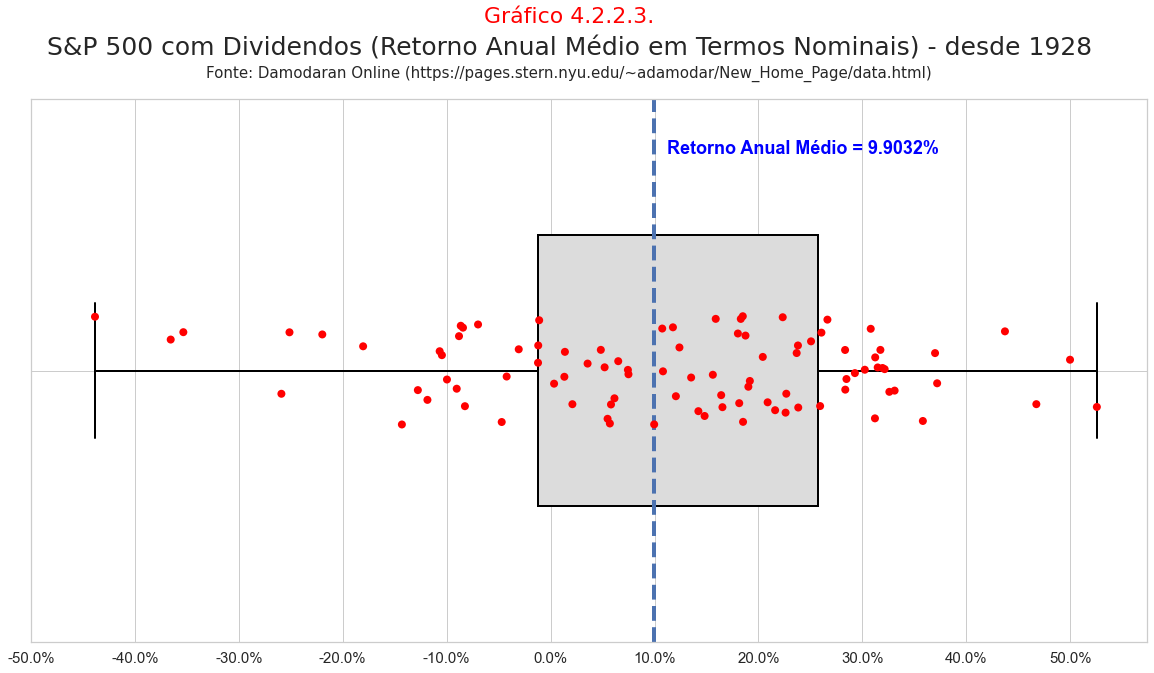

In [69]:
# GRÁFICO 4.2.2.3.
# S&P 500 (includes dividends) - Nominal Returns (since 1928)
pd.options.display.float_format = '{:,.6f}'.format

SPNominal = pd.read_csv('C:/Users/mvrgu/OneDrive/Documentos/Scanned Documents/Mestrado/Trabalho Final/DamodaranData/Tratados/Damodaran.csv', encoding='utf-8-sig', sep=';')
SPNominal = SPNominal[(SPNominal['Year'] > 1929)]
SPNominal = SPNominal[(SPNominal['Year'] < 2024)]
SPNominal1 = pd.read_csv('C:/Users/mvrgu/OneDrive/Documentos/Scanned Documents/Mestrado/Trabalho Final/DamodaranData/Tratados/Damodaran.csv', encoding='utf-8-sig', sep=';')
SPNominal1 = SPNominal1[(SPNominal1['Year'] > 1928)]
SPNominal1 = SPNominal1[(SPNominal1['Year'] < 2024)]

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.boxplot(x=SPNominal['Nominal Return S&P 500 (includes dividends)']*100,  whis=np.inf, width=0.5,capprops=dict(color="black", linewidth=2),whiskerprops=dict(color="black", linewidth=2), boxprops=dict(color="black", facecolor="gainsboro", linewidth=2), medianprops={'color': 'forestgreen', 'ls': '-', 'lw': 0}, flierprops=dict(marker='o', color="black", linewidth=5, alpha=.5),showmeans=False,meanline=True,meanprops={'color': 'blue', 'ls': 'solid', 'lw': 4})
ax = sns.stripplot(x=SPNominal['Nominal Return S&P 500 (includes dividends)']*100,  color="red", s = 8)
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center', fontsize=15)
ax.xaxis.set_ticks(np.arange(-50,60,10))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f%%'))
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_yticklabels(ax.get_yticklabels(),rotation=90,verticalalignment='center',fontsize=17)
ax.text(x=1.8, y=-0.64, s='Gráfico 4.2.2.3.', fontsize=22, weight='normal',horizontalalignment='center', family="DejaVu", color="red")
ax.text(x=1.8, y=-0.58, s='S&P 500 com Dividendos (Retorno Anual Médio em Termos Nominais) - desde 1928', fontsize=25, weight='normal',horizontalalignment='center', family="DejaVu")
ax.text(x=1.8, y=-0.54, s='Fonte: Damodaran Online (https://pages.stern.nyu.edu/~adamodar/New_Home_Page/data.html)', fontsize=15, weight='normal',horizontalalignment='center', family="DejaVu")

plt.axvline((np.power((SPNominal['Nominal Value S&P 500 (includes dividends)'].iloc[-1])/100,(1/(SPNominal['Year'].iloc[-1]-1928)))-1)*100, 0, 1, ls = "--", lw = 4)
MediaSPNominal = 'Retorno Anual Médio = ' + np.round((np.power((SPNominal['Nominal Value S&P 500 (includes dividends)'].iloc[-1])/100,(1/(SPNominal['Year'].iloc[-1]-1928)))-1)*100, decimals = 4).astype(str) +'%'
for ytick in ax.get_yticks():
    ax.text((np.power((SPNominal['Nominal Return S&P 500 (includes dividends)'].iloc[-1])/100,(1/(SPNominal['Year'].iloc[-1]-1928)))-1)*-400,ytick-0.4,(MediaSPNominal),
                 horizontalalignment='center',size='small',color='blue',weight='semibold', rotation = 0,fontsize=18)

plt.grid()
plt.show()
ax.get_figure().savefig('C:/Users/mvrgu/OneDrive/Documentos/Scanned Documents/Mestrado/Trabalho Final/DamodaranData/Tratados/S&P 500 with Dividends.pdf',bbox_inches='tight')


C:\Users\mvrgu\AppData\Local\Temp/ipykernel_17372/3576092772.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center', fontsize=15)


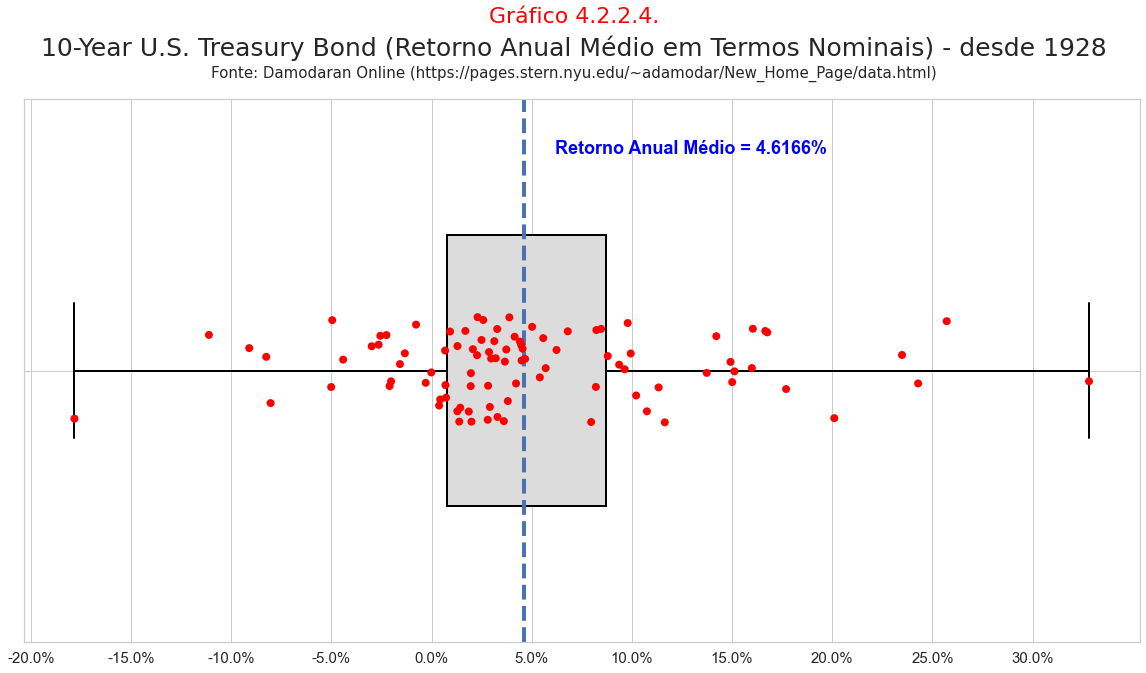

In [70]:
# GRÁFICO 4.2.2.4.
# 10-Year U.S. Treasury Bond - Nominal Returns (since 1928)
pd.options.display.float_format = '{:,.6f}'.format

USTreasuryNominal = pd.read_csv('C:/Users/mvrgu/OneDrive/Documentos/Scanned Documents/Mestrado/Trabalho Final/DamodaranData/Tratados/Damodaran.csv', encoding='utf-8-sig', sep=';')
USTreasuryNominal = USTreasuryNominal[(USTreasuryNominal['Year'] > 1929)]
USTreasuryNominal = USTreasuryNominal[(USTreasuryNominal['Year'] < 2024)]
USTreasuryNominal1 = pd.read_csv('C:/Users/mvrgu/OneDrive/Documentos/Scanned Documents/Mestrado/Trabalho Final/DamodaranData/Tratados/Damodaran.csv', encoding='utf-8-sig', sep=';')
USTreasuryNominal1 = USTreasuryNominal1[(USTreasuryNominal1['Year'] > 1928)]
USTreasuryNominal1 = USTreasuryNominal1[(USTreasuryNominal1['Year'] < 2024)]
pd.options.display.float_format = '{:,.1f}'.format

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.boxplot(x=USTreasuryNominal['Nominal Return US T. Bond (10-year)']*100,  whis=np.inf, width=0.5,capprops=dict(color="black", linewidth=2),whiskerprops=dict(color="black", linewidth=2), boxprops=dict(color="black", facecolor="gainsboro", linewidth=2), medianprops={'color': 'forestgreen', 'ls': '-', 'lw': 0}, flierprops=dict(marker='o', color="black", linewidth=5, alpha=.5),showmeans=False,meanline=True,meanprops={'color': 'blue', 'ls': 'solid', 'lw': 4})
ax = sns.stripplot(x=USTreasuryNominal['Nominal Return US T. Bond (10-year)']*100,  color="red", s = 8)
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center', fontsize=15)
ax.xaxis.set_ticks(np.arange(-20,35,5))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f%%'))
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_yticklabels(ax.get_yticklabels(),rotation=90,verticalalignment='center',fontsize=17)
ax.text(x=7.1, y=-0.64, s='Gráfico 4.2.2.4.', fontsize=22, weight='normal',horizontalalignment='center', family="DejaVu", color="red")
ax.text(x=7.1, y=-0.58, s='10-Year U.S. Treasury Bond (Retorno Anual Médio em Termos Nominais) - desde 1928', fontsize=25, weight='normal',horizontalalignment='center', family="DejaVu")
ax.text(x=7.1, y=-0.54, s='Fonte: Damodaran Online (https://pages.stern.nyu.edu/~adamodar/New_Home_Page/data.html)', fontsize=15, weight='normal',horizontalalignment='center', family="DejaVu")

plt.axvline((np.power((USTreasuryNominal['Nominal Value US T. Bond (10-year)'].iloc[-1])/100,(1/(USTreasuryNominal['Year'].iloc[-1]-1928)))-1)*100, 0, 1, ls = "--", lw = 4)
MediaUSTNominal = 'Retorno Anual Médio = ' + np.round((np.power((USTreasuryNominal['Nominal Value US T. Bond (10-year)'].iloc[-1])/100,(1/(USTreasuryNominal['Year'].iloc[-1]-1928)))-1)*100, decimals = 4).astype(str) +'%'
for ytick in ax.get_yticks():
    ax.text((np.power((USTreasuryNominal['Nominal Value US T. Bond (10-year)'].iloc[-1])/100,(1/(USTreasuryNominal['Year'].iloc[-1]-1928)))-1)*280,ytick-0.4,(MediaUSTNominal),
                 horizontalalignment='center',size='small',color='blue',weight='semibold', rotation = 0,fontsize=18)

plt.grid()
plt.show()
ax.get_figure().savefig('C:/Users/mvrgu/OneDrive/Documentos/Scanned Documents/Mestrado/Trabalho Final/DamodaranData/Tratados/Nominal Value US T. Bond (10-year).pdf',bbox_inches='tight')


C:\Users\mvrgu\AppData\Local\Temp/ipykernel_17372/701512775.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center', fontsize=15)


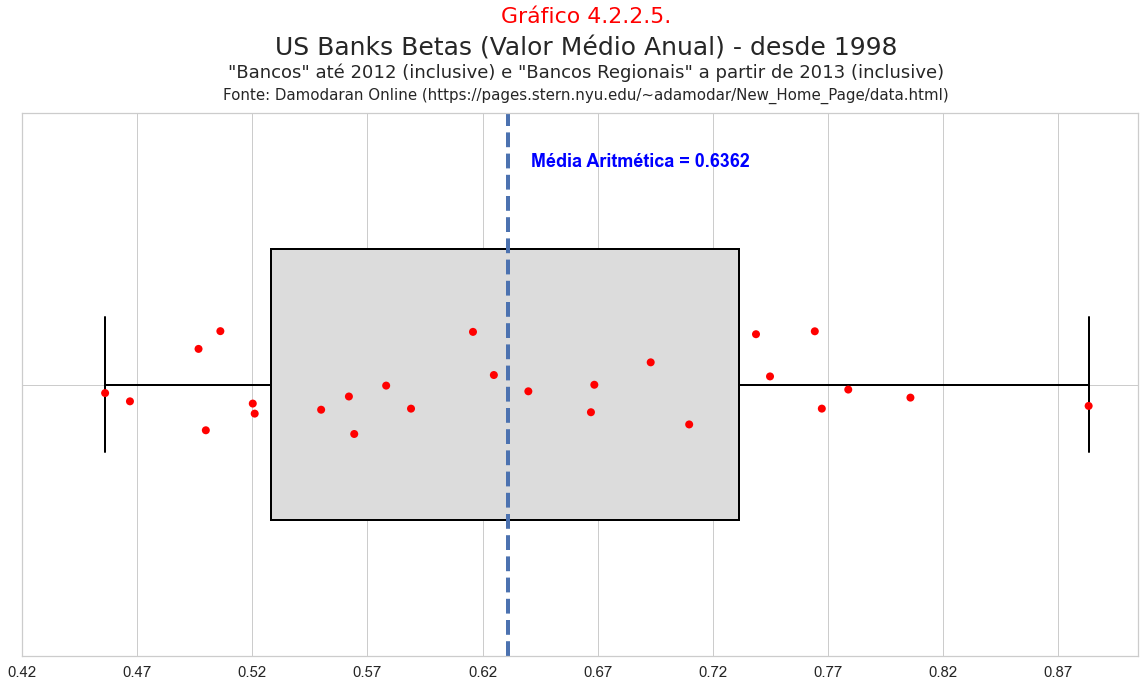

In [72]:
# GRÁFICO 4.2.2.5.
# Average Beta US Banks (since 1998)
# "Bancos" até 2012 (inclusive)
# "Bancos Regionais" a partir de 2013 (inclusive)
pd.options.display.float_format = '{:,.6f}'.format

Beta = pd.read_csv('C:/Users/mvrgu/OneDrive/Documentos/Scanned Documents/Mestrado/Trabalho Final/BetaData/Tratados/Beta.csv', encoding='utf-8-sig', sep=',', decimal='.')
Beta = Beta[(Beta['Year'] > 1997)]
Beta = Beta[(Beta['Year'] < 2024)]
list = ['Bank', 'Banks (Regional)']
Beta = Beta[Beta["Industry Name"].isin(list)] 
Beta = Beta.drop(Beta[(Beta['Industry Name'] == 'Bank') & (Beta['Year'] == 2013)].index)

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.boxplot(x=Beta['Average Beta'],  whis=np.inf, width=0.5,capprops=dict(color="black", linewidth=2),whiskerprops=dict(color="black", linewidth=2), boxprops=dict(color="black", facecolor="gainsboro", linewidth=2), medianprops={'color': 'forestgreen', 'ls': '-', 'lw': 0}, flierprops=dict(marker='o', color="black", linewidth=5, alpha=.5),showmeans=False,meanline=True,meanprops={'color': 'blue', 'ls': 'solid', 'lw': 4})
ax = sns.stripplot(x=Beta['Average Beta'],  color="red", s = 8)
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center', fontsize=15)
ax.xaxis.set_ticks(np.arange(0.425,0.9,0.05))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_yticklabels(ax.get_yticklabels(),rotation=90,verticalalignment='center',fontsize=17)
ax.text(x=0.67,y=-0.665, s='Gráfico 4.2.2.5.', fontsize=22, weight='normal',horizontalalignment='center', family="DejaVu", color="red")
ax.text(x=0.67,y=-0.605, s='US Banks Betas (Valor Médio Anual) - desde 1998', fontsize=25, weight='normal',horizontalalignment='center', family="DejaVu")
ax.text(x=0.67, y=-0.565, s='"Bancos" até 2012 (inclusive) e "Bancos Regionais" a partir de 2013 (inclusive)', fontsize=18, weight='normal',horizontalalignment='center', family="DejaVu")
ax.text(x=0.67, y=-0.525, s='Fonte: Damodaran Online (https://pages.stern.nyu.edu/~adamodar/New_Home_Page/data.html)', fontsize=15, weight='normal',horizontalalignment='center', family="DejaVu")

plt.axvline(Beta['Average Beta'].mean(), 0, 1, ls = "--", lw = 4)
MediaBeta = 'Média Aritmética = ' + np.round(Beta['Average Beta'].mean(), decimals = 4).astype(str)
for ytick in ax.get_yticks():
    ax.text(Beta['Average Beta'].mean()*1.09,ytick-0.4,(MediaBeta),
                 horizontalalignment='center',size='small',color='blue',weight='semibold', rotation = 0,fontsize=18)

plt.grid()
plt.show()
ax.get_figure().savefig('C:/Users/mvrgu/OneDrive/Documentos/Scanned Documents/Mestrado/Trabalho Final/DamodaranData/Tratados/Average Beta US Banks.pdf',bbox_inches='tight')
